In [312]:
from fastai.data.all import *
from fastai.vision.all import *
from fastbook import *

In [313]:
import torch
import torchvision.models as models
from torch.profiler import profile, record_function, ProfilerActivity

In [314]:
import numpy as np

In [315]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [316]:
device

device(type='cpu')

In [317]:
path = untar_data(URLs.MNIST_SAMPLE)

In [318]:
path.ls()

(#3) [Path('/Users/stephenzhou/.fastai/data/mnist_sample/valid'),Path('/Users/stephenzhou/.fastai/data/mnist_sample/labels.csv'),Path('/Users/stephenzhou/.fastai/data/mnist_sample/train')]

In [319]:
(path/'train').ls()

(#2) [Path('/Users/stephenzhou/.fastai/data/mnist_sample/train/7'),Path('/Users/stephenzhou/.fastai/data/mnist_sample/train/3')]

In [320]:
threes = sorted((path/'train/3').ls())

In [321]:
sevens = (path/'train/7').ls().sorted()

In [322]:
im3_path = threes[1]

In [323]:
im3 = Image.open(im3_path)

In [324]:
im3

In [325]:
array(im3).shape

(28, 28)

In [326]:
im3_t = tensor(im3)

In [327]:
df = pd.DataFrame(im3_t[4:15, 4:22])

In [328]:
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [329]:
tensors3 = [tensor(Image.open(o)) for o in threes]

In [330]:
tensors7 = [tensor(Image.open(o)) for o in sevens]

In [331]:
len(tensors3)

6131

In [332]:
len(tensors7)

6265

<Axes: >

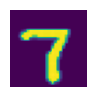

In [333]:
show_image(tensors7[0])

In [334]:
stacked_sevens = torch.stack(tensors7).float()/255

In [335]:
stacked_threes = torch.stack(tensors3).float()/255

In [336]:
stacked_threes.shape

torch.Size([6131, 28, 28])

In [337]:
mean3 = stacked_threes.mean(0)

<Axes: >

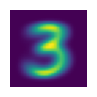

In [338]:
show_image(mean3)

In [339]:
mean7 = stacked_sevens.mean(0)

<Axes: >

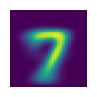

In [340]:
show_image(mean7)

In [341]:
def f(t, params):
    return params[0]*(t**2) + params[1]*t + params[2]

In [342]:
def mse(preds, targets):
    return torch.mean((preds - targets)**2)

In [343]:
params = torch.randn(3).requires_grad_()

In [344]:
params

tensor([ 0.4034,  0.0723, -0.0412], requires_grad=True)

In [345]:
time = torch.arange(20).float()

In [346]:
speed = torch.randn(20)*3 + 0.75 * (time - 9.5)**2 + 1

In [347]:
pred = f(time, params)

In [348]:
pred

tensor([-4.1222e-02,  4.3442e-01,  1.7168e+00,  3.8058e+00,  6.7016e+00,  1.0404e+01,  1.4913e+01,  2.0229e+01,  2.6352e+01,  3.3281e+01,  4.1017e+01,  4.9560e+01,  5.8909e+01,  6.9066e+01,
         8.0028e+01,  9.1798e+01,  1.0437e+02,  1.1776e+02,  1.3195e+02,  1.4694e+02], grad_fn=<AddBackward0>)

In [349]:
speed

tensor([75.9311, 54.6443, 40.3471, 33.4488, 26.9393, 12.9294,  8.7598,  5.5035,  1.9208,  1.6847, -0.6810,  4.0407,  6.9511, 15.3436, 15.0912, 23.8518, 33.8891, 45.3920, 54.7591, 72.0036])

In [350]:
def show_preds(preds, ax = None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

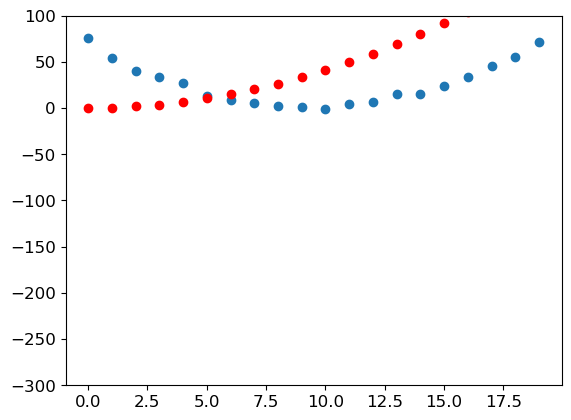

In [351]:
show_preds(pred)

In [352]:
loss = mse(pred, speed)

In [353]:
loss.backward()

In [354]:
params.grad

tensor([14947.7773,   964.4949,    47.6448])

In [355]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= 1e-5 * params.grad
    params.grad = None
    if prn:
        print(loss.item())
    return preds

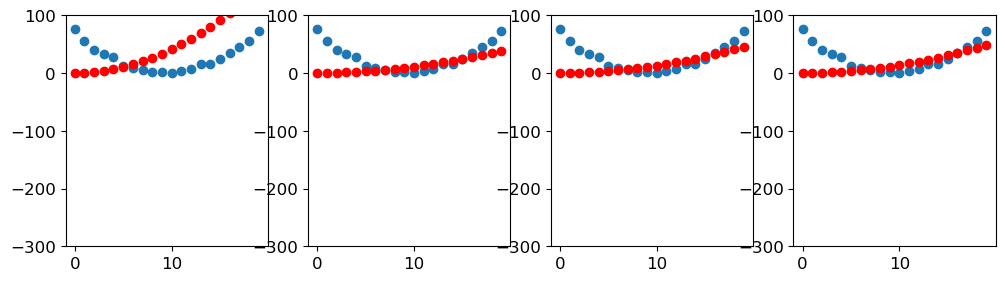

In [356]:
_, axes = plt.subplots(1,4,figsize=(12,3))
for ax in axes:
    show_preds(apply_step(params, False),ax)

In [357]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [358]:
train_x.shape

torch.Size([12396, 784])

In [359]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [360]:
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [361]:
dset = list(zip(train_x, train_y))

In [362]:
len(dset)

12396

In [363]:
x, y = dset[0]

In [364]:
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

In [365]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])

In [366]:
valid_3_tens = valid_3_tens.float()/255

In [367]:
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])

In [368]:
valid_7_tens = valid_7_tens.float()/255

In [369]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [370]:
valid_7_tens.shape

torch.Size([1028, 28, 28])

In [371]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)

In [372]:
valid_y = tensor(len(valid_3_tens)*[1] + len(valid_7_tens)*[0]).unsqueeze(1)

In [373]:
valid_dset = list(zip(valid_x, valid_y))

In [374]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [375]:
valid_7_tens.shape

torch.Size([1028, 28, 28])

In [376]:
valid_x.shape

torch.Size([2038, 784])

In [377]:
valid_y.shape

torch.Size([2038, 1])

In [378]:
len(valid_dset)

2038

In [379]:
def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()

In [380]:
weights = init_params((784,1))

In [381]:
bias = init_params(1)

In [382]:
(train_x[0]*weights.T).sum() + bias

tensor([1.6246], grad_fn=<AddBackward0>)

In [383]:
def linear1(xb):
    return xb@weights + bias

In [384]:
preds = linear1(train_x)

In [385]:
preds

tensor([[ 1.6246],
        [ 7.9091],
        [-3.3117],
        ...,
        [ 3.0202],
        [-3.6869],
        [ 1.7940]], grad_fn=<AddBackward0>)

In [386]:
corrects = (preds>0.5).float() == train_y

In [387]:
(corrects.sum()/len(corrects)).item()

0.5497741103172302

In [388]:
def mnist_loss(preds, targets):
    preds = preds.sigmoid()
    return torch.where(targets==1, 1-preds, preds).mean()

In [389]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

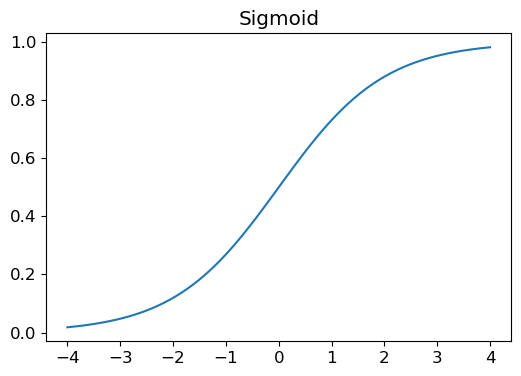

In [390]:
plot_function(torch.sigmoid, title = 'Sigmoid', min=-4, max=4)

In [391]:
coll = range(15)

In [392]:
dl = DataLoader(coll, batch_size = 5, shuffle=True)

In [393]:
list(dl)

[tensor([ 3,  2, 10,  9, 13]),
 tensor([14,  6,  8,  0,  1]),
 tensor([ 7,  4,  5, 12, 11])]

In [394]:
ds = L(enumerate(string.ascii_lowercase))

In [395]:
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [396]:
len(ds)

26

In [397]:
dl = DataLoader(ds, batch_size=6, shuffle=True)

In [398]:
list(dl)

[(tensor([ 3, 16, 17,  8,  7,  2]), ('d', 'q', 'r', 'i', 'h', 'c')),
 (tensor([10, 22,  4, 14, 25, 15]), ('k', 'w', 'e', 'o', 'z', 'p')),
 (tensor([ 1, 12, 19,  5,  9, 11]), ('b', 'm', 't', 'f', 'j', 'l')),
 (tensor([ 0, 23, 21, 13, 18, 20]), ('a', 'x', 'v', 'n', 's', 'u')),
 (tensor([ 6, 24]), ('g', 'y'))]

In [399]:
weights = init_params((28*28,1))

In [400]:
bias = init_params(1)

In [401]:
dl = DataLoader(dset, batch_size = 256)

In [402]:
xb, yb = first(dl)

In [403]:
xxb, yyb = list(dl)[0]

In [404]:
xxb.shape, yyb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [405]:
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [406]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [407]:
batch = train_x[:4]

In [408]:
batch.shape

torch.Size([4, 784])

In [409]:
torch.Size([4, 784])

torch.Size([4, 784])

In [410]:
train_x.shape

torch.Size([12396, 784])

In [411]:
preds = linear1(batch)

In [412]:
preds

tensor([[-6.3672],
        [-7.3696],
        [-6.5319],
        [-6.3195]], grad_fn=<AddBackward0>)

In [413]:
loss = mnist_loss(preds, train_y[:4])

In [414]:
loss.backward()

In [415]:
loss.data.item()

0.9986011385917664

In [416]:
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0002), tensor([-0.0014]))

In [417]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()
    return loss.data.item()

In [418]:
calc_grad(batch, train_y[:4], linear1)

0.9986011385917664

In [419]:
weights.grad.mean(), bias.grad

(tensor(-0.0004), tensor([-0.0028]))

In [420]:
calc_grad(batch, train_y[:4], linear1)

0.9986011385917664

In [421]:
weights.grad.mean(), bias.grad

(tensor(-0.0006), tensor([-0.0042]))

In [422]:
weights.grad.zero_()

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [423]:
bias.grad.zero_()

tensor([0.])

In [424]:
def train_epoch(model, lr, params):
    losses = []
    for xb, yb in dl:
        losses.append(calc_grad(xb, yb, model))
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()
    return losses

In [425]:
(preds>0.5).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [426]:
def batch_accuracy(xb,yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()
    

In [427]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [428]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [429]:
validate_epoch(linear1)

0.4944

In [430]:
lr = 5

In [431]:
bias.grad.zero_()

tensor([0.])

In [432]:
weights.grad.zero_();

In [433]:
params = weights, bias

In [434]:
losses = train_epoch(linear1, lr, params)

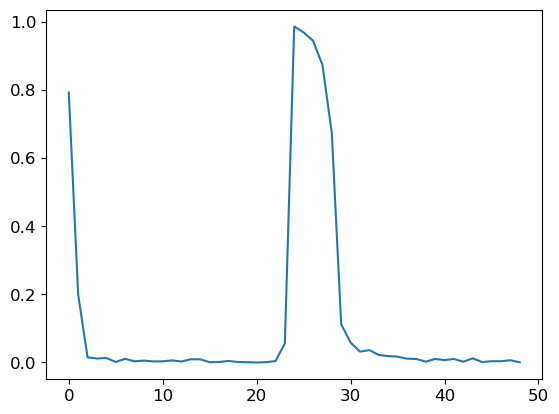

In [435]:
plt.plot(np.array(losses))

In [436]:
validate_epoch(linear1)

0.5703

In [437]:
weights = init_params((28*28,1))
bias = init_params(1)

In [438]:
params = weights,bias

In [439]:
avg_losses = []
for i in range(20):
    loss = train_epoch(linear1, lr, params)
    avg_losses.append(np.mean(loss))
    print(validate_epoch(linear1), end = ' ')

0.5688 0.7539 0.8681 0.915 0.9365 0.9458 0.9536 0.9614 0.9648 0.9682 0.9697 0.9721 0.9751 0.9755 0.976 0.9765 0.9765 0.9765 0.977 0.978 

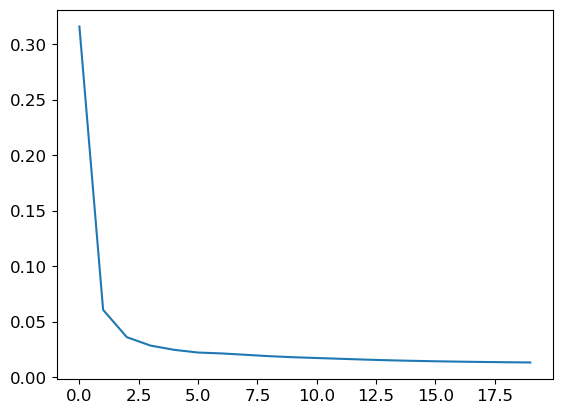

In [440]:
plt.plot(avg_losses)

In [441]:
linear_model = nn.Linear(28*28,1)

In [442]:
w, b = linear_model.parameters()

In [443]:
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [444]:
b

Parameter containing:
tensor([0.0051], requires_grad=True)

In [445]:
class BasicOptim:
    def __init__(self, params, lr):
        self.params, self.lr = list(params), lr
        
    def step(self, *args, **kwargs):
        for p in self.params:
            p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params:
            p.grad = None

In [446]:
opt = BasicOptim(linear_model.parameters(), lr)

In [447]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [448]:
validate_epoch(linear_model)

0.6105

In [449]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end = ' ')

In [450]:
train_model(linear_model, 20)

0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 

In [451]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 

In [452]:
dls = DataLoaders(dl, valid_dl)

In [453]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func = SGD, loss_func = mnist_loss, metrics=batch_accuracy)

In [454]:
learn.fit(10, lr = 3)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637672,0.504416,0.495584,00:00
1,0.633537,0.504416,0.495584,00:00
2,0.632519,0.504416,0.495584,00:00
3,0.632187,0.504416,0.495584,00:00
4,0.632069,0.504416,0.495584,00:00
5,0.632025,0.504416,0.495584,00:00
6,0.632010,0.504416,0.495584,00:00
7,0.632004,0.504416,0.495584,00:00
8,0.632002,0.504416,0.495584,00:00
9,0.632001,0.504416,0.495584,00:00


In [455]:
def simple_net(xb):
    res = xb@w1 + b1
    res = F.relu()
    res = res@w2 + b2
    return res

In [456]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [457]:
simple_net = nn.Sequential(nn.Linear(28*28,30), nn.ReLU(), nn.Linear(30,1))

In [458]:
learn = Learner(dls, simple_net, opt_func = SGD, loss_func = mnist_loss, metrics=batch_accuracy)

In [459]:
learn.fit(20,1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.162475,0.489219,0.504416,00:00
1,0.081868,0.220548,0.787046,00:00
2,0.041708,0.105624,0.900393,00:00
3,0.026474,0.073606,0.930815,00:00
4,0.019554,0.059286,0.944553,00:00
5,0.016054,0.050651,0.952404,00:00
6,0.014119,0.045334,0.956820,00:00
7,0.012885,0.041860,0.959764,00:00
8,0.011955,0.039432,0.964181,00:00
9,0.011195,0.037523,0.964671,00:00


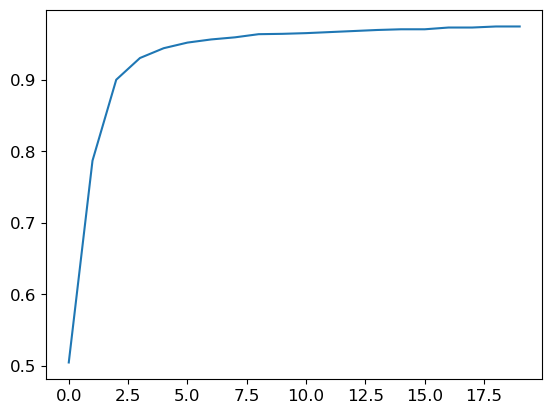

In [460]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [629]:
learn.recorder.values[-1][2]

0.9749754667282104

In [ ]:
learn.recorder